## 탐색적 분석
+ exploratory data analysis : EDA
+ 본격적인 데이터 분석 전에 데이터의 각 컬럼에 대한 이해와 데이터의 결측치, 이상치 처리 및 필터링을 수행
+ 누구나 이해하기 쉬운 시각화 수행 과정

In [1]:
iris = spark.read.csv("iris.csv", header=False, inferSchema=True)

NameError: name 'spark' is not defined

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [13]:
from pyspark.sql.functions import col

In [ ]:
iris.show(5)

In [ ]:
iris = iris.withColumnRenamed('_c0', 'Sepal Length').withColumnRenamed('_c1', 'Sepal Width')\
.withColumnRenamed('_c2', 'Petal Length').withColumnRenamed('_c3', 'Petal Width').withColumnRenamed('_c4', 'Species')

In [ ]:
iris.show(5)

### 데이터분석 함수 : avg, max, min, sum, count

### agg({컬럼명:집계함수})

In [ ]:
meanVals = iris.agg({'Sepal Length':'avg','Sepal Width':'avg'})

In [ ]:
meanVals.show()

In [ ]:
maxVals = iris.agg({'Sepal Length':'max', 'Petal Length':'max'})

### 데이터분석 함수2 : var_samp, stddev_samp, cor, corr

In [ ]:
varVals = iris.agg({'Sepal Length':'var_samp','Sepal Width' : 'var_samp'})

In [ ]:
varVals.show() # 표본분산

In [ ]:
stddevVals = iris.agg({'Sepal Length':'stddev_samp','Sepal Width' : 'stddev_samp'})

In [ ]:
stddevVals.show() # 표본표준편차

In [ ]:
covVals = iris.cov('Sepal Length', 'Sepal Width')

In [ ]:
covVals # 공분산 : 두 변수간의 선형관계

In [ ]:
corrVals = iris.corr('Sepal Length', 'Sepal Width')

In [ ]:
corrVals #상관계수 : 두 변수간의 상관관계

### 데이터의 외형 확인
+ 산점도 : plot(x변수, y변수, 그래프옵션)

In [ ]:
iris2 = iris.toPandas()

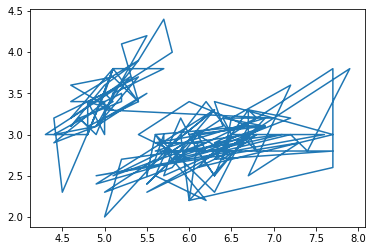

In [18]:
plt.plot(iris2['Sepal Length'], iris2['Sepal Width'])

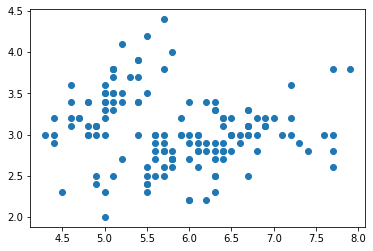

In [19]:
plt.plot(iris2['Sepal Length'], iris2['Sepal Width'], 'o')

In [ ]:
plt.plot(iris2['Sepal Length'], iris2['Sepal Width'], 'or')

In [ ]:
covVals2 = iris.cov('Petal Length', 'Petal Width')

In [ ]:
covVals2

In [ ]:
corrVals2 = iris.corr('Petal Length', 'Petal Width')

In [ ]:
corrVals2

In [ ]:
plt.plot(iris2['Petal Length'], iris2['Petal Width'], 'or')

### 범주형 데이터 : 막대그래프

In [ ]:
sns.countplot(data=iris2, x='Species')

### 연속형 데이터 : 히스토그램
+ hist(대상컬럼, 옵션)

In [ ]:
plt.hist(iris2['Sepal Length'])

### 확률밀도 그래프 : kde
+ kdeplot(변수, 데이터객체)

In [ ]:
sns.kdeplot(data=iris2, x='Sepal Length')

### 데이터분석 함수3 : summary, describe

In [ ]:
iris.summary().show()

In [ ]:
iris.select(col('Sepal Length'), col('Sepal Width')).summary(['count', 'mean', 'min', 'max']).show()

In [ ]:
iris.describe().show()

In [ ]:
iris.describe(['Sepal Length', 'Sepal Width']).show()

In [7]:
loan = spark.read.csv("loan.csv", header=True, inferSchema=True)

In [8]:
loan.show(5)

+-------+------------+-------------+-----------------------+-----------------------------------------------+-------------+---------------+-----------+-------------+---+----------------+-----+
|loan_id|loan_purpose|is_first_loan|total_credit_card_limit|avg_percentage_credit_card_limit_used_last_year|saving_amount|checking_amount|is_employed|yearly_salary|age|dependent_number|label|
+-------+------------+-------------+-----------------------+-----------------------------------------------+-------------+---------------+-----------+-------------+---+----------------+-----+
|    A_1|    personal|            1|                   7900|                                            0.8|         1103|           6393|          1|        16400| 42|               4|    0|
|    A_2|    personal|            0|                   3300|                                           0.29|         2588|            832|          1|        75500| 56|               1|    0|
|    A_3|    personal|            0|    

In [9]:
loan2 = loan.toPandas()

In [ ]:
loan2.describe()

<AxesSubplot:xlabel='label', ylabel='count'>

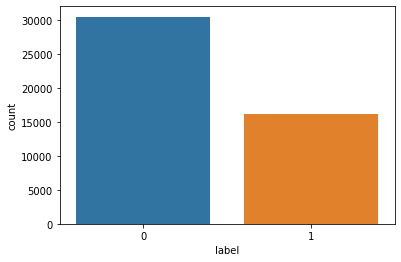

In [15]:
sns.countplot(data=loan2, x='label')

In [18]:
loan.groupBy('loan_purpose').count().show()

+------------+-----+
|loan_purpose|count|
+------------+-----+
|      others| 6763|
|   emergency| 7562|
|    property|11388|
|  operations|10580|
|    personal|10458|
+------------+-----+



<AxesSubplot:xlabel='loan_purpose', ylabel='count'>

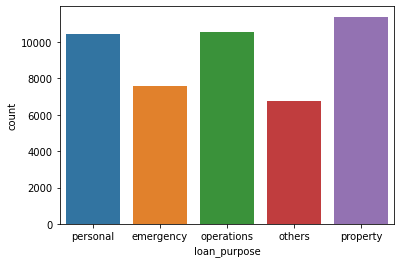

In [19]:
sns.countplot(data=loan2, x='loan_purpose')

In [20]:
loan.groupBy('is_first_loan').count().show()

+-------------+-----+
|is_first_loan|count|
+-------------+-----+
|            1|25313|
|            0|21438|
+-------------+-----+



<AxesSubplot:xlabel='is_first_loan', ylabel='count'>

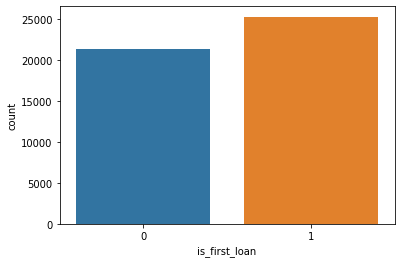

In [21]:
sns.countplot(data=loan2, x='is_first_loan')

<AxesSubplot:xlabel='is_employed', ylabel='count'>

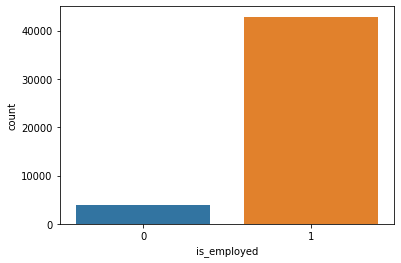

In [23]:
sns.countplot(data=loan2, x='is_employed')

<AxesSubplot:xlabel='dependent_number', ylabel='count'>

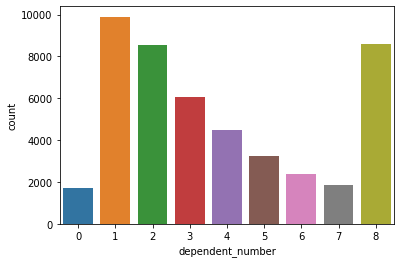

In [24]:
sns.countplot(data=loan2, x='dependent_number')

(array([4452., 5725., 7441., 7923., 7553., 5890., 3880., 2274., 1126.,
         487.]),
 array([18. , 24.1, 30.2, 36.3, 42.4, 48.5, 54.6, 60.7, 66.8, 72.9, 79. ]),
 <BarContainer object of 10 artists>)

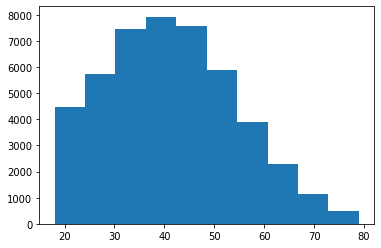

In [22]:
plt.hist(loan2['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

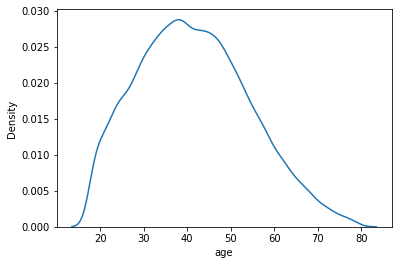

In [25]:
sns.kdeplot(data=loan2, x='age')

<AxesSubplot:xlabel='yearly_salary', ylabel='Density'>

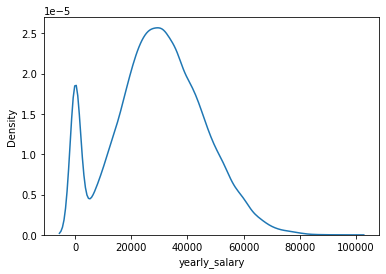

In [26]:
sns.kdeplot(data=loan2, x='yearly_salary')

### 대출자 저축금액 분포

<AxesSubplot:xlabel='saving_amount', ylabel='Density'>

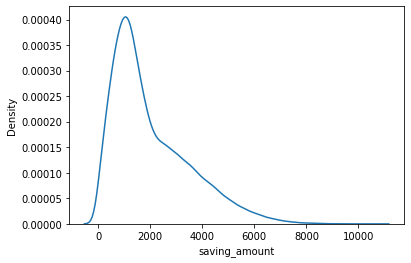

In [27]:
sns.kdeplot(data=loan2, x='saving_amount')

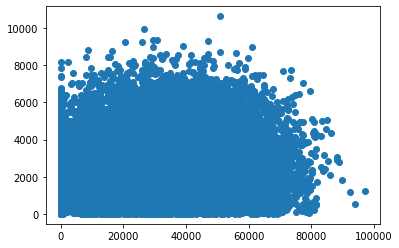

In [28]:
plt.plot(loan2['yearly_salary'], loan2['saving_amount'], 'o')

In [30]:
loan.cov('yearly_salary', 'saving_amount')

4931472.718232857